In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as ls 
from tqdm import tqdm

In [2]:
import matplotlib as mpl
mpl.rc('font', size=18)
mpl.rc('legend', fontsize=18)
mpl.rc('legend', numpoints=1)
mpl.rc('legend', handlelength=1.5)
mpl.rc('legend', frameon=False)
#mpl.rc('xtick.major', pad=7)
#mpl.rc('xtick.minor', pad=7)
mpl.rc('lines', lw=2)
mpl.rc('xtick',labelsize =15) 
mpl.rc('ytick',labelsize =15)


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:

#Hamiltonian matrix

def H_(N,gamma,alpha):
    
    #Hamiltonian matrix
    H = np.zeros((N,N))

    for i in range(N):
        for j in range(N):
            if i ==j:
                H[i,j] = 0
            elif i > j:
                r_ij = min(abs(i - j), N - abs(i -j))
                H[i,j] = -gamma*(1/(r_ij**alpha))
                H[j,i] = H[i,j]

    H[0,N-1] = H[N-1,0]  # Periodic Boundary conditions
    
    
    return H

In [4]:
def survival_prob(N,gamma,alpha,psi_0,tau,D,m):

    H = H_(N,gamma,alpha)


    s_prob = np.zeros(m)
    
    s_prob[0] = np.abs(np.vdot(psi_0,psi_0))
    
    for i in range(1,m):
        
        #Time Evolution operator
        ut = np.asarray(ls.expm(-(1.0j)*H*tau))
        
        #wavefunction before measurement
        psit = ut.dot(psi_0)      

        #wavefunctuion just after measurement
        psit[D] = 0

        # survival probability
        s_prob[i] = np.abs(np.vdot(psit,psit))
        
        psi_0 = psit
        

    
    return s_prob

In [5]:
#first detection probability is the derivative of survival probability
# For example: F_1 = S_0 - S_1

def fdp(N,gamma,alpha,psi_0,tau,D,m):
    
    f_n =  np.zeros(m)

    s_prob = survival_prob(N,gamma,alpha,psi_0,tau,D,m)

    for i in range(m-1):
        f_n[i] = s_prob[i] - s_prob[i+1]

    return f_n 

In [6]:
def mfdt(N,gamma,alpha,psi_0,tau,D,m):
    f_n = fdp(N,gamma,alpha,psi_0,tau,D,m)

    sum_f = 0
    for i in range(len(f_n)):
        sum_f = sum_f + (i+1)*f_n[i]

    return sum_f

In [116]:
#parameters
    # tau is the interval between two measurements
    # H is a matrix of size(N,N)
    #psi_0 is an array of size(N,1)
    #m is the number of measurement before final detection
    #D is the measuremnt site. For return problem, we use the origin as the detected and initial site
    
N = 6
gamma = 1
m = [500,1000]
tau  =  np.arange(0,2*np.pi+0.01,0.01)
D = 0
alpha = 0


#Initial State
psi_0 = np.zeros((N,1))
psi_0[0] = 1

print(np.abs(np.vdot(psi_0,psi_0)))


1.0


In [117]:
mean1_n  = np.zeros(len(tau))
mean2_n  = np.zeros(len(tau))

for i in tqdm(range(len(mean_n))):

    mean1_n[i] = mfdt(N,gamma,alpha,psi_0,tau[i],D,m[0])
    mean2_n[i] = mfdt(N,gamma,alpha,psi_0,tau[i],D,m[1])

100%|██████████| 630/630 [00:16<00:00, 37.60it/s]


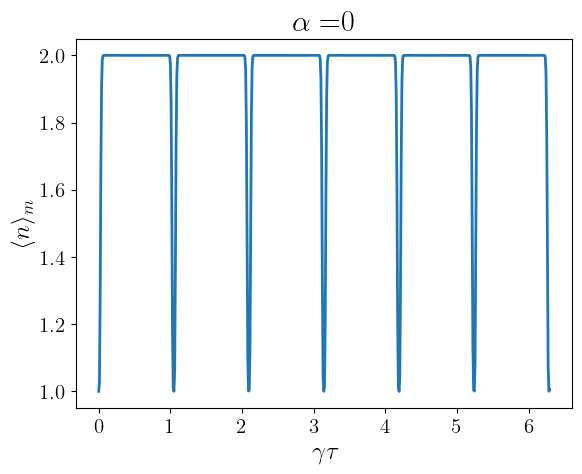

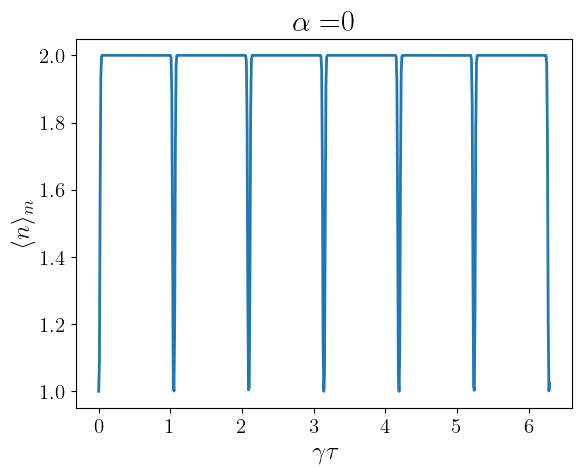

In [118]:
plt.plot(tau,mean1_n)
plt.xlabel(r'$\gamma \tau$')
plt.ylabel(r'$\langle n \rangle_m$')
plt.title(f'$\\alpha =${alpha}')
#plt.savefig(f'mean_n_alpha{alpha}.pdf',bbox_inches = 'tight')
plt.show()

plt.plot(tau,mean2_n)
plt.xlabel(r'$\gamma \tau$')
plt.ylabel(r'$\langle n \rangle_m$')
plt.title(f'$\\alpha =${alpha}')
plt.show()

In [ ]:
mean1_n